In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
names1880=pd.read_csv('names/yob2018.txt',names=['name','sex','births'])

In [4]:
names1880.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32033 entries, 0 to 32032
Data columns (total 3 columns):
name      32033 non-null object
sex       32033 non-null object
births    32033 non-null int64
dtypes: int64(1), object(2)
memory usage: 750.9+ KB


In [5]:
names1880[:5]

,name,sex,births
0,Emma,F,18688
1,Olivia,F,17921
2,Ava,F,14924
3,Isabella,F,14464
4,Sophia,F,13928


In [6]:
names1880.groupby('sex').births.sum()

sex
F    1686961
M    1800392
Name: births, dtype: int64

In [7]:
#2018 is last year of births
years=range(1880,2019)
pieces = []
columns = ['name', 'sex', 'births']


In [8]:
for year in years:
    path='names/yob%d.txt' % year
    frame=pd.read_csv(path,names=columns)
    frame['year']=year
    pieces.append(frame)
names = pd.concat(pieces, ignore_index=True)


In [9]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957046 entries, 0 to 1957045
Data columns (total 4 columns):
name      object
sex       object
births    int64
year      int64
dtypes: int64(2), object(2)
memory usage: 59.7+ MB


In [10]:
total_births = names.pivot_table('births',columns='sex',index='year',aggfunc=sum)

In [11]:
total_births.tail()

sex,F,M
year,,
2014,1782350,1916564
2015,1780453,1911537
2016,1766212,1891585
2017,1719138,1842837
2018,1686961,1800392


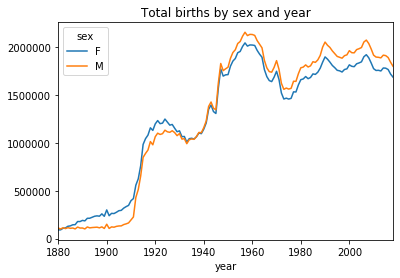

In [13]:
total_births.plot(title='Total births by sex and year')

In [14]:
def add_prop(group):
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [15]:
names[:5]

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [16]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957046 entries, 0 to 1957045
Data columns (total 5 columns):
name      object
sex       object
births    int64
year      int64
prop      float64
dtypes: float64(1), int64(2), object(2)
memory usage: 74.7+ MB


In [18]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [74]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

In [75]:
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)

In [21]:
top1000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277877 entries, 0 to 277876
Data columns (total 5 columns):
name      277877 non-null object
sex       277877 non-null object
births    277877 non-null int64
year      277877 non-null int64
prop      277877 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 10.6+ MB


In [22]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [25]:
total_births = top1000.pivot_table('births', index='year', columns='name',aggfunc=sum)

In [26]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 1880 to 2018
Columns: 7174 entries, Aaden to Zyaire
dtypes: float64(7174)
memory usage: 7.6 MB


In [32]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002572D92C7F0>,
      dtype=object)

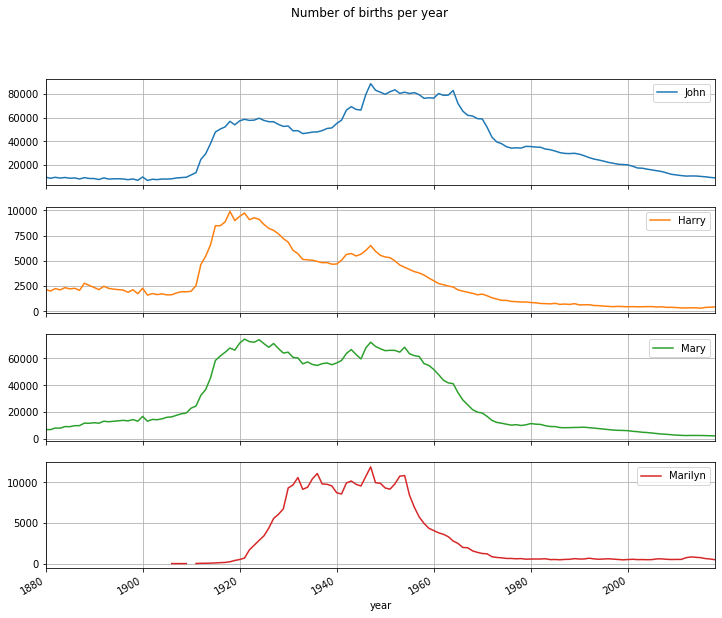

In [31]:
#Name famous in year john,Harry,Mary,Marilyn
subset.plot(subplots=True, figsize=(12, 10), grid=True,title="Number of births per year")

In [33]:
table = top1000.pivot_table('prop', index='year',columns='sex', aggfunc=sum)

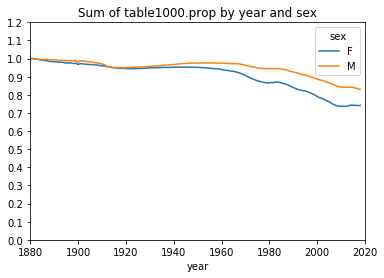

In [36]:
#plot between  year and sex
table.plot(title='Sum of table1000.prop by year and sex',yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2030, 20))

In [39]:
df = boys[boys.year == 2018]

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 276877 to 277876
Data columns (total 5 columns):
name      1000 non-null object
sex       1000 non-null object
births    1000 non-null int64
year      1000 non-null int64
prop      1000 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [41]:
prop_cumsum = df.sort_index(by='prop', ascending=False).prop.cumsum()

C:\New folder\new python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


In [42]:
prop_cumsum[:10]

276877    0.011018
276878    0.021164
276879    0.029227
276880    0.036739
276881    0.044176
276882    0.051608
276883    0.058766
276884    0.065756
276885    0.072663
276886    0.079523
Name: prop, dtype: float64

In [43]:
prop_cumsum.searchsorted(0.5)

148

In [44]:
#Boys in 1900
df = boys[boys.year == 1900]

In [76]:
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()
in1900.searchsorted(0.5) + 1

25

In [77]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [47]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


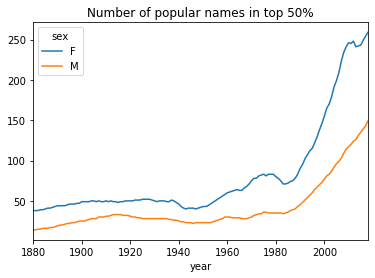

In [48]:
diversity.plot(title="Number of popular names in top 50%")

# The “Last letter” Revolution

In [49]:
# extract last letter from name column
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

In [50]:
table = names.pivot_table('births', index=last_letters,columns=['sex', 'year'], aggfunc=sum)

In [56]:
subtable = table.reindex(columns=[1910, 1960, 2010,2015,2018], level='year')

In [57]:
subtable.head()

sex                 F                                                M  \
year             1910      1960      2010      2015      2018     1910   
last_letter                                                              
a            108399.0  691261.0  676865.0  660321.0  646970.0    977.0   
b                 NaN     694.0     455.0     596.0     576.0    411.0   
c                 5.0      49.0     956.0    1255.0    1115.0    482.0   
d              6751.0    3731.0    2642.0    3252.0    3516.0  22113.0   
e            133601.0  435030.0  316764.0  326957.0  300769.0  28665.0   

sex                                                  
year             1960      2010      2015      2018  
last_letter                                          
a              5212.0   28868.0   28994.0   30691.0  
b              3912.0   39276.0   29583.0   22563.0  
c             15454.0   23348.0   23128.0   19338.0  
d            262116.0   44828.0   43748.0   41585.0  
e            178768.0  130253.0  128504.0  119409.0

In [58]:
subtable.sum()

sex  year
F    1910     396505.0
     1960    2022010.0
     2010    1775345.0
     2015    1780453.0
     2018    1686961.0
M    1910     194212.0
     1960    2132155.0
     2010    1916476.0
     2015    1911537.0
     2018    1800392.0
dtype: float64

In [59]:
letter_prop = subtable / subtable.sum().astype(float)

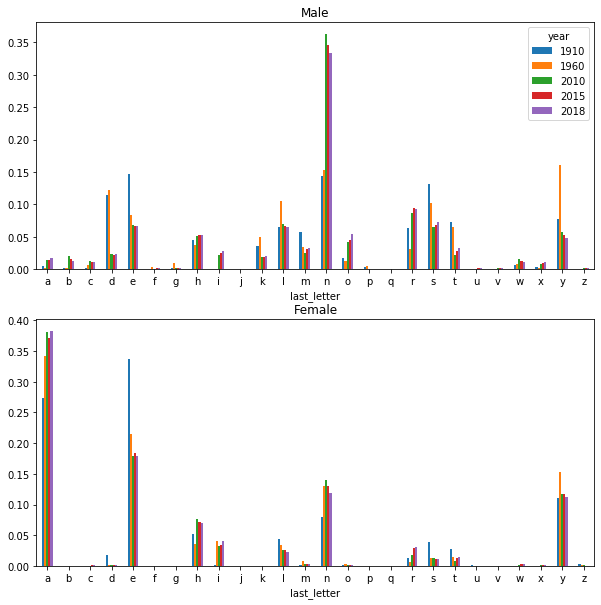

In [62]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',legend=False)

In [86]:
letter_prop = table / table.sum().astype(float)
dny_ts = letter_prop.ix[['d', 'n', 'y'], 'M'].T
dny_ts.head()

C:\New folder\new python\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


KeyError: "None of [Index(['d', 'n', 'y'], dtype='object', name='year')] are in the [index]"

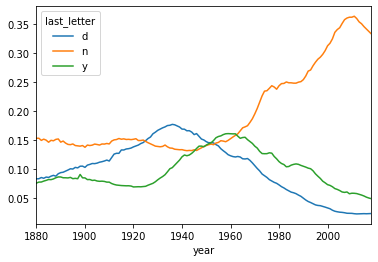

In [87]:
dny_ts.plot()

# Boy names that became girl names (and vice versa)

In [67]:
all_names = top1000.name.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [69]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee       993
Lesley     35033
Lesli        929
Leslie    378168
Lesly      11433
Name: births, dtype: int64

In [70]:
table = filtered.pivot_table('births', index='year',columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)
table.tail()

sex,F,M
year,,
2014,1.0,NaN
2015,1.0,NaN
2016,1.0,NaN
2017,1.0,NaN
2018,1.0,NaN


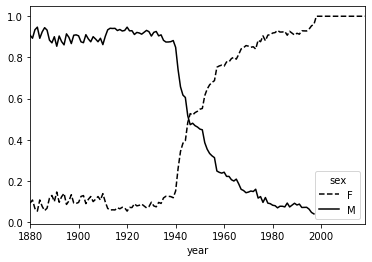

In [71]:
table.plot(style={'M': 'k-', 'F': 'k--'})